In [372]:
import math
import matplotlib
import numpy as np
import pandas as pd
import time
from sklearn import metrics
from sklearn.metrics import r2_score
from datetime import date, datetime, time
from matplotlib import pyplot as plt

np.warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
#When making scatter plot for prediction and test we want the points to be close to the 45 degree line 
#or y=x line as it indicated a more accurate prediction.

## 1)Linear Regression

In [373]:
df = pd.read_csv(r'C:\Users\vkumar\Downloads\MSFT.csv')

In [374]:
df.loc[:, 'Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

df.columns = [str(x).replace(' ', '_') for x in df.columns]

df.sort_values(by='Date', inplace=True, ascending=True)

df.head(10)

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2011-07-01,25.930000,28.150000,25.840000,27.400000,21.955933,1259328200
1,2011-08-01,27.510000,27.690001,23.790001,26.600000,21.314878,1719339500
2,2011-09-01,26.459999,27.500000,24.600000,24.889999,20.070518,1279920200
3,2011-10-01,24.719999,27.500000,24.260000,26.629999,21.473600,1218142500
4,2011-11-01,26.190001,27.200001,24.299999,25.580000,20.626919,1046207400
5,2011-12-01,25.559999,26.190001,25.160000,25.959999,21.090965,1007166600
6,2012-01-01,26.549999,29.950001,26.389999,29.530001,23.991377,1354858100
7,2012-02-01,29.790001,32.000000,29.709999,31.740000,25.786882,984332300
8,2012-03-01,31.930000,32.950001,31.490000,32.259998,26.381887,942366500
9,2012-04-01,32.220001,32.889999,30.230000,32.020000,26.185619,940739700


In [375]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from math import sqrt

In [376]:
dfreg = df.loc[:,['Open','Close','Adj_Close','Volume']]

In [377]:
dfreg.fillna(value=-99999, inplace=True)

forecast_out = int(math.ceil(0.01 * len(dfreg)))

dfreg['label'] = dfreg['Adj_Close'].shift(-forecast_out)

X = np.array(dfreg.drop(['label'], 1))

X = preprocessing.scale(X)

X = X[:-forecast_out]

y = np.array(dfreg['label'])

y = y[:-forecast_out]

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [379]:
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [380]:
print(clfreg.score(X_test, y_test))

0.9889158790352633


In [381]:
ypred=clfreg.predict(X_test)

In [382]:
print('MAE =',metrics.mean_absolute_error(y_test,ypred))
print('MSE =',metrics.mean_squared_error(y_test,ypred))
print('RMSE =',np.sqrt(metrics.mean_squared_error(y_test,ypred)))


MAE = 3.995314651033094
MSE = 43.91903879774
RMSE = 6.627144090612487


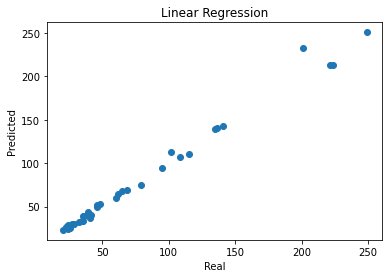

In [383]:
plt.scatter(y_test,ypred)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.show()

## 2)KNN

In [384]:
df = pd.read_csv(r'C:\Users\vkumar\Downloads\MSFT.csv')

In [385]:
df.loc[:, 'Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

df.columns = [str(x).replace(' ', '_') for x in df.columns]

df.sort_values(by='Date', inplace=True, ascending=True)

df.head(10)

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2011-07-01,25.930000,28.150000,25.840000,27.400000,21.955933,1259328200
1,2011-08-01,27.510000,27.690001,23.790001,26.600000,21.314878,1719339500
2,2011-09-01,26.459999,27.500000,24.600000,24.889999,20.070518,1279920200
3,2011-10-01,24.719999,27.500000,24.260000,26.629999,21.473600,1218142500
4,2011-11-01,26.190001,27.200001,24.299999,25.580000,20.626919,1046207400
5,2011-12-01,25.559999,26.190001,25.160000,25.959999,21.090965,1007166600
6,2012-01-01,26.549999,29.950001,26.389999,29.530001,23.991377,1354858100
7,2012-02-01,29.790001,32.000000,29.709999,31.740000,25.786882,984332300
8,2012-03-01,31.930000,32.950001,31.490000,32.259998,26.381887,942366500
9,2012-04-01,32.220001,32.889999,30.230000,32.020000,26.185619,940739700


In [386]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from math import sqrt

In [387]:
dfreg = df.loc[:,['Open','Close','Adj_Close','Volume']]

In [388]:
dfreg.fillna(value=-99999, inplace=True)

forecast_out = int(math.ceil(0.02 * len(dfreg)))

dfreg['label'] = dfreg['Adj_Close'].shift(-forecast_out)

X = np.array(dfreg.drop(['label'], 1))

X = preprocessing.scale(X)

X = X[:-forecast_out]
X_lately = X[-forecast_out:]

y = np.array(dfreg['label'])

y = y[:-forecast_out]

In [389]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [390]:
clfknn = KNeighborsRegressor(n_neighbors=6)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [391]:
print(clfknn.score(X_test, y_test))

0.9889761917609934


In [392]:
rmse_val = [] 
for K in range(15):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  
    pred=model.predict(X_test)
    error = np.sqrt(metrics.mean_squared_error(y_test,pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 6.194326120877852
RMSE value for k=  2 is: 5.97079802517282
RMSE value for k=  3 is: 9.363176244608026
RMSE value for k=  4 is: 7.479788168180486
RMSE value for k=  5 is: 6.913753283133943
RMSE value for k=  6 is: 6.707685686505523
RMSE value for k=  7 is: 6.513872922365991
RMSE value for k=  8 is: 8.055241178853207
RMSE value for k=  9 is: 9.278579595192374
RMSE value for k=  10 is: 10.778779956989133
RMSE value for k=  11 is: 12.989250549474091
RMSE value for k=  12 is: 14.919560707187612
RMSE value for k=  13 is: 15.665412689651724
RMSE value for k=  14 is: 15.823389887867364
RMSE value for k=  15 is: 17.23524213008864


Text(0, 0.5, 'RMSE')

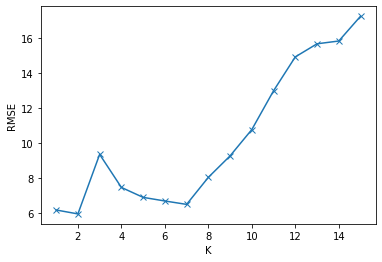

In [393]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, K+1), rmse_val, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xlabel('K')
plt.ylabel('RMSE')

In [394]:
def get_mape(y_true, y_pred): 
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [395]:
mape=[]
for K in range(15):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  
    pred=model.predict(X_test)
    error = get_mape(y_test,pred)
    mape.append(error) 

Text(0, 0.5, 'MAPE')

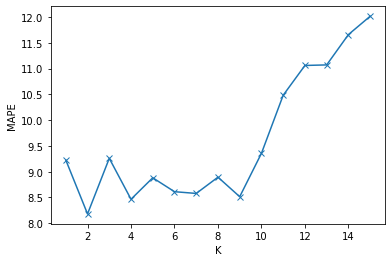

In [396]:
plt.figure(figsize=(6,4))
plt.plot(range(1, K+1), mape, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')

plt.xlabel('K')
plt.ylabel('MAPE')


In [397]:
R2=[]
for K in range(15):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  
    pred=model.predict(X_test)
    error = r2_score(y_test,pred)
    R2.append(error) 
print(R2)

[0.9905989930199598, 0.9912652394664903, 0.9785200810328775, 0.9862922921665861, 0.9882884602288614, 0.9889761917609934, 0.9896040350726137, 0.9841019690499955, 0.9789064713371664, 0.9715340649309787, 0.9586615270095037, 0.9454621122176509, 0.9398729463573711, 0.9386541341499646, 0.9272184969611232]


Text(0, 0.5, 'R2')

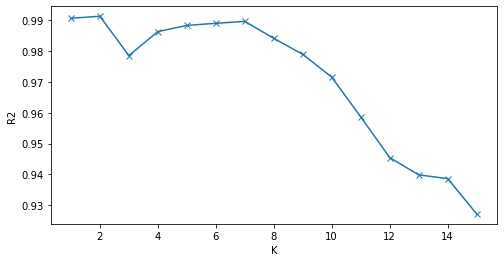

In [398]:
plt.figure(figsize=(8, 4))
plt.plot(range(1,K+1), R2, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xlabel('K')
plt.ylabel('R2')

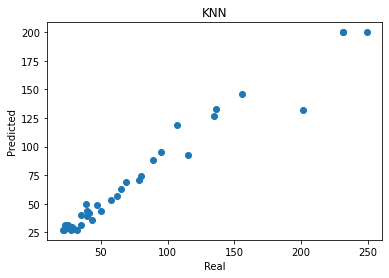

In [399]:
plt.scatter(y_test,pred)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title("KNN")
plt.show()

## 3)Random Forest

In [400]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier


In [401]:
df = pd.read_csv(r'C:\Users\vkumar\Downloads\MSFT.csv')

In [402]:
#dfreg = df.loc[:,['Adj_Close', 'Volume']]

In [403]:
dfreg.fillna(value=-99999, inplace=True)

forecast_out = int(math.ceil(0.02 * len(dfreg)))

dfreg['label'] = dfreg['Adj_Close'].shift(-forecast_out)

X = np.array(dfreg.drop(['label'], 1))

X = preprocessing.scale(X)

X = X[:-forecast_out]
X_lately = X[-forecast_out:]

y = np.array(dfreg['label'])

y = y[:-forecast_out]

In [404]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [405]:
clf = RandomForestRegressor(n_estimators = 50,random_state=42)

In [406]:
model = clf.fit(X_train, y_train)

In [407]:
print(model.score(X_test, y_test))

0.9913762833569311


In [408]:
Rmse=[]
for n in range(10,100,5):
    clf = RandomForestRegressor(n_estimators = n,random_state=42)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    Rmse.append(error)
    print('RMSE value for n_estimators= ' , n , 'is:', error)

RMSE value for n_estimators=  10 is: 5.761968473079912
RMSE value for n_estimators=  15 is: 5.680103467023791
RMSE value for n_estimators=  20 is: 5.443969657774575
RMSE value for n_estimators=  25 is: 5.662379411188115
RMSE value for n_estimators=  30 is: 5.759833728614139
RMSE value for n_estimators=  35 is: 5.866757000121913
RMSE value for n_estimators=  40 is: 5.783598246208732
RMSE value for n_estimators=  45 is: 5.862880787029745
RMSE value for n_estimators=  50 is: 5.932723634632091
RMSE value for n_estimators=  55 is: 5.974126158818409
RMSE value for n_estimators=  60 is: 5.874695966554338
RMSE value for n_estimators=  65 is: 5.850665904009281
RMSE value for n_estimators=  70 is: 5.836653900572812
RMSE value for n_estimators=  75 is: 5.814086197964505
RMSE value for n_estimators=  80 is: 5.80054913133829
RMSE value for n_estimators=  85 is: 5.8152481544352925
RMSE value for n_estimators=  90 is: 5.820545222191259
RMSE value for n_estimators=  95 is: 5.856610473151132


Text(0, 0.5, 'RMSE')

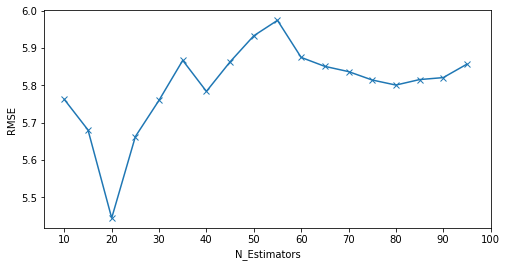

In [409]:
plt.figure(figsize=(8, 4))
plt.plot(range(10, 100,5), Rmse, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('N_Estimators')
plt.ylabel('RMSE')

In [410]:
def get_mape(y_true, y_pred): 
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [411]:
mape=[]
for n in range(10,100,5): 
    clf = RandomForestRegressor(n_estimators = n,random_state=42)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error=get_mape(y_test,y_pred)
    mape.append(error)
print(mape)

[5.63079565394237, 5.360453883277049, 5.501384503239468, 5.575668325268966, 5.5761395234199345, 5.475199989104537, 5.406730586473388, 5.471809695126167, 5.637678779708626, 5.666700426784007, 5.6330047985088845, 5.56395817137317, 5.532068381921621, 5.621417719433539, 5.654339083014629, 5.7341406890403315, 5.713852542960545, 5.713322422189873]


Text(0, 0.5, 'MAPE')

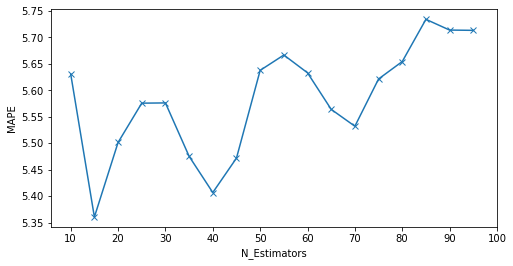

In [412]:
plt.figure(figsize=(8,4))
plt.plot(range(10,100,5), mape, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('N_Estimators')
plt.ylabel('MAPE')

In [413]:
R2=[]
for n in range(10,100,5): 
    clf = RandomForestRegressor(n_estimators = n,random_state=42)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error = r2_score(y_test,y_pred)
    R2.append(error) 
print(R2)


[0.9918655536807209, 0.9920950571285992, 0.9927386455915851, 0.9921443129407173, 0.9918715800057804, 0.9915669933550074, 0.9918043674835784, 0.9915781331830619, 0.9913762833569311, 0.9912554992099094, 0.9915441546197346, 0.9916131893127876, 0.9916533130525775, 0.991717733999845, 0.9917562566704445, 0.9917144232150046, 0.9916993217955405, 0.9915961378164587]


Text(0, 0.5, 'R2')

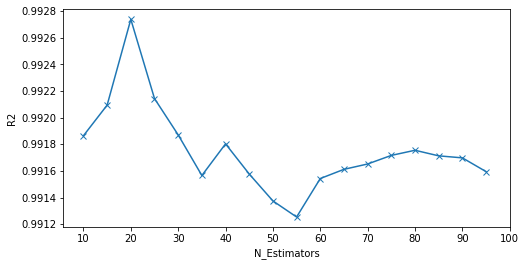

In [414]:
plt.figure(figsize=(8, 4))
plt.plot(range(10, 100,5), R2, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('N_Estimators')
plt.ylabel('R2')

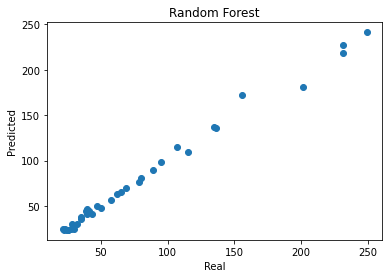

In [415]:
plt.scatter(y_test,y_pred)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title("Random Forest")
plt.show()

## 4)XGBoost 

In [416]:
from xgboost import XGBRegressor

In [417]:
df = pd.read_csv(r'C:\Users\vkumar\Downloads\MSFT.csv')

In [418]:
#dfreg = df.loc[:,['Adj_Close', 'Volume']]

In [419]:
dfreg.fillna(value=-99999, inplace=True)

forecast_out = int(math.ceil(0.02 * len(dfreg)))

dfreg['label'] = dfreg['Adj_Close'].shift(-forecast_out)

X = np.array(dfreg.drop(['label'], 1))

X = preprocessing.scale(X)

X = X[:-forecast_out]
X_lately = X[-forecast_out:]

y = np.array(dfreg['label'])

y = y[:-forecast_out]

In [420]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [421]:
clfxgb = XGBRegressor(eval_metric = "mlogloss",n_estimators=15)
clfxgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=15, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [422]:
print(clfxgb.score(X_test, y_test))

0.9862935093632775


In [423]:
Rmse=[]
for n in range(10,100,5):
    clf = XGBRegressor(n_estimators = n,random_state=42)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    Rmse.append(error)
    print('RMSE value for n_estimators= ' , n , 'is:', error)

RMSE value for n_estimators=  10 is: 9.852703384910162
RMSE value for n_estimators=  15 is: 7.479456071244955
RMSE value for n_estimators=  20 is: 7.150430809429841
RMSE value for n_estimators=  25 is: 7.160481157623513
RMSE value for n_estimators=  30 is: 7.1771151127381545
RMSE value for n_estimators=  35 is: 7.206180289317347
RMSE value for n_estimators=  40 is: 7.224890151298586
RMSE value for n_estimators=  45 is: 7.228467286355701
RMSE value for n_estimators=  50 is: 7.236647345041575
RMSE value for n_estimators=  55 is: 7.241831316637357
RMSE value for n_estimators=  60 is: 7.2419764486562785
RMSE value for n_estimators=  65 is: 7.24449941582549
RMSE value for n_estimators=  70 is: 7.245843078484716
RMSE value for n_estimators=  75 is: 7.246448632107613
RMSE value for n_estimators=  80 is: 7.248204152332726
RMSE value for n_estimators=  85 is: 7.249482436378503
RMSE value for n_estimators=  90 is: 7.250168724476516
RMSE value for n_estimators=  95 is: 7.250931795371933


Text(0, 0.5, 'RMSE')

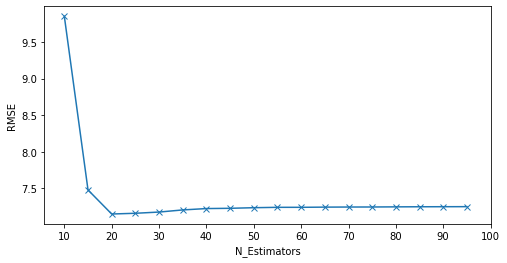

In [424]:
plt.figure(figsize=(8, 4))
plt.plot(range(10, 100,5), Rmse, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('N_Estimators')
plt.ylabel('RMSE')

In [425]:
def get_mape(y_true, y_pred): 
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [426]:
mape=[]
for n in range(10,100,5): 
    clf = XGBRegressor(n_estimators = n,random_state=42)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error=get_mape(y_test,y_pred)
    mape.append(error)
print(mape)

[7.2952424389104165, 6.623441652889454, 6.543530267514062, 6.720975941747248, 6.731128904560261, 6.738413022565959, 6.74297911476252, 6.736221290652263, 6.739553869280876, 6.757694959812167, 6.757971990825057, 6.76069823317757, 6.760551600264191, 6.7642427938175596, 6.7688520467919675, 6.771943549512663, 6.774486636397323, 6.77692961874292]


Text(0, 0.5, 'MAPE')

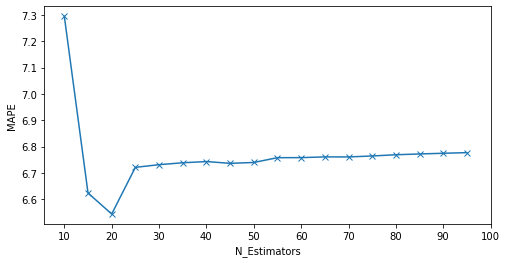

In [427]:
plt.figure(figsize=(8,4))
plt.plot(range(10,100,5), mape, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('N_Estimators')
plt.ylabel('MAPE')

In [428]:
R2=[]
for n in range(10,100,5): 
    clf = XGBRegressor(n_estimators = n,random_state=42)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error = r2_score(y_test,y_pred)
    R2.append(error) 
print(R2)

[0.9762153338826961, 0.9862935093632775, 0.9874728966817656, 0.9874376567823255, 0.9873792237916824, 0.9872767960475501, 0.9872106421597237, 0.9871979746769383, 0.9871689835871355, 0.9871505940081807, 0.9871500789785318, 0.9871411240816641, 0.9871363536778793, 0.9871342034924422, 0.9871279690173266, 0.9871234284270206, 0.987120990334045, 0.9871182791931096]


Text(0, 0.5, 'R2')

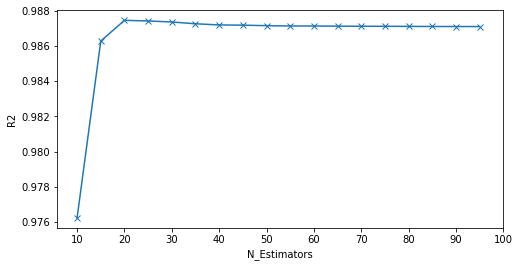

In [429]:
plt.figure(figsize=(8, 4))
plt.plot(range(10, 100,5), R2, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('N_Estimators')
plt.ylabel('R2')

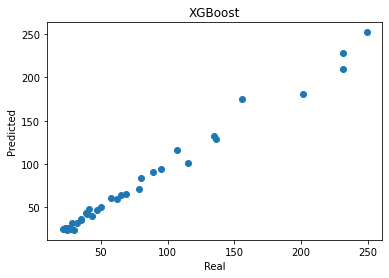

In [430]:
plt.scatter(y_test,y_pred)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title("XGBoost")
plt.show()

## 5)Neural Network

In [431]:
from sklearn.neural_network import MLPRegressor

In [432]:
df = pd.read_csv(r'C:\Users\vkumar\Downloads\MSFT.csv')

In [433]:
#dfreg = df.loc[:,['Adj_Close', 'Volume']]

In [434]:
dfreg.fillna(value=-99999, inplace=True)

forecast_out = int(math.ceil(0.02 * len(dfreg)))

dfreg['label'] = dfreg['Adj_Close'].shift(-forecast_out)

X = np.array(dfreg.drop(['label'], 1))

X = preprocessing.scale(X)

X = X[:-forecast_out]
X_lately = X[-forecast_out:]

y = np.array(dfreg['label'])

y = y[:-forecast_out]

In [435]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [436]:
clfmlp=MLPRegressor(hidden_layer_sizes=(150,100,50), max_iter=225)
clfmlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=225)

In [437]:
print(clfmlp.score(X_test, y_test))

0.8438470818325526


In [438]:
Rmse=[]
for n in range(200,401,25):
    clf = MLPRegressor(hidden_layer_sizes=(150,100,50), max_iter=n)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    Rmse.append(error)
    print('RMSE value for max_iter= ' , n , 'is:', error)

RMSE value for max_iter=  200 is: 27.626748523914625
RMSE value for max_iter=  225 is: 25.085391389513937
RMSE value for max_iter=  250 is: 25.631964685604466
RMSE value for max_iter=  275 is: 26.72333692066674
RMSE value for max_iter=  300 is: 25.86480172782615
RMSE value for max_iter=  325 is: 28.739200738984028
RMSE value for max_iter=  350 is: 29.25842185843402
RMSE value for max_iter=  375 is: 23.087728618749143
RMSE value for max_iter=  400 is: 25.058915279814176


Text(0, 0.5, 'RMSE')

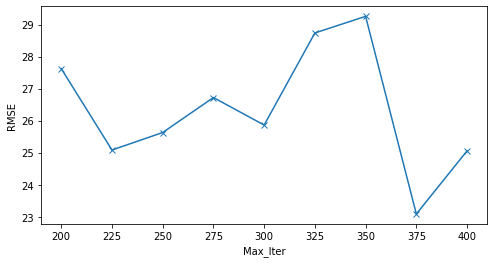

In [439]:
plt.figure(figsize=(8, 4))
plt.plot(range(200, 401,25), Rmse, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xlabel('Max_Iter')
plt.ylabel('RMSE')

In [440]:
def get_mape(y_true, y_pred): 
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [441]:
mape=[]
for n in range(200,401,25): 
    clf = MLPRegressor(hidden_layer_sizes=(150,100,50), max_iter=n)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error=get_mape(y_test,y_pred)
    mape.append(error)
print(mape)

[21.864804453563206, 20.02832723323007, 18.24649646969242, 18.33999728263803, 21.37103609653601, 19.448652254119548, 19.156504217099513, 20.513760675922608, 19.4518381846312]


Text(0, 0.5, 'MAPE')

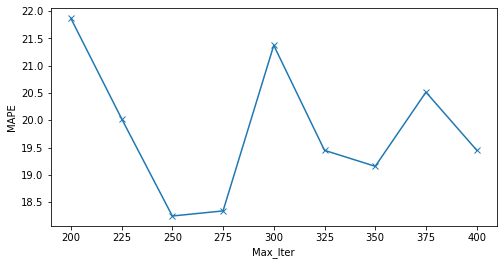

In [442]:
plt.figure(figsize=(8,4))
plt.plot(range(200,401,25), mape, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xlabel('Max_Iter')
plt.ylabel('MAPE')

In [443]:
R2=[]
for n in range(200,401,25): 
    clf = MLPRegressor(hidden_layer_sizes=(150,100,50), max_iter=n)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error = r2_score(y_test,y_pred)
    R2.append(error) 
print(R2)

[0.8045204475928385, 0.8218786919395763, 0.8559951026439502, 0.8572179448276487, 0.785614866340286, 0.8104416780623453, 0.8263454796083027, 0.7922525934848648, 0.8266264257763041]


Text(0, 0.5, 'R2')

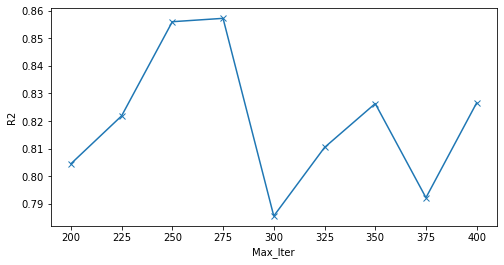

In [444]:
plt.figure(figsize=(8, 4))
plt.plot(range(200, 401,25), R2, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xlabel('Max_Iter')
plt.ylabel('R2')

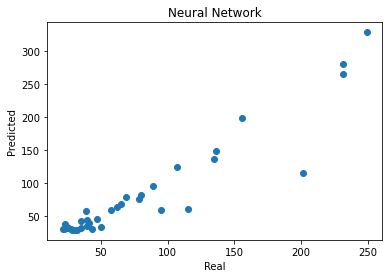

In [445]:
plt.scatter(y_test,y_pred)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title("Neural Network")
plt.show()